# Dasar Text-Preprocessing dengan Python#
Text data needs to be cleaned and encoded to numerical values before giving them to machine learning models, this process of cleaning and encoding is called as text preprocessing.

---

## Case Folding: Lowercase ##
Merubah format teks menjadi format huruf kecil semua (_lowercase_).

In [1]:
kalimat = "Berikut ini adalah 5 negara dengan pendidikan terbaik di dunia adalah Korea Selatan, Jepang, Singapura, Hong Kong, dan Finlandia."
lower_case = kalimat.lower()
print(lower_case)


berikut ini adalah 5 negara dengan pendidikan terbaik di dunia adalah korea selatan, jepang, singapura, hong kong, dan finlandia.


## Case Folding: Removing Number ##
Menghapus karakter angka.

In [ ]:
import re

kalimat = "Berikut ini adalah 5 negara dengan pendidikan terbaik di dunia adalah Korea Selatan, Jepang, Singapura, Hong Kong, dan Finlandia."

hasil = re.sub(r"\d+", "", kalimat)
hasil

'Berikut ini adalah  negara dengan pendidikan terbaik di dunia adalah Korea Selatan, Jepang, Singapura, Hong Kong, dan Finlandia.'

## Case Folding: Removing Punctuation ##
Menghapus karakter tanda baca.

In [ ]:
import string

kalimat = "Ini &adalah [contoh] kalimat? {dengan} tanda. baca?!!"
hasil = kalimat.translate(str.maketrans("", "", string.punctuation))
hasil

'Ini adalah contoh kalimat dengan tanda baca'

## Case Folding: Removing Whitespace ##
Menghapus karakter kosong.

In [4]:
kalimat = " \t    ini kalimat contoh \t   \n"
hasil = kalimat.strip()

hasil

'ini kalimat contoh'

## Separating Sentences with Split () Method ##
Fungsi `split()` memisahkan _string_ ke dalam _list_ dengan spasi sebagai pemisah jika tidak ditentukan pemisahnya.

https://www.w3schools.com/python/ref_string_split.asp

In [5]:
kalimat = "rumah idaman adalah rumah yang bersih"
pisah = kalimat.split()

pisah

['rumah', 'idaman', 'adalah', 'rumah', 'yang', 'bersih']

## Tokenizing: Word Tokenizing Using NLTK Module ##
Menggunakan _library_ NLTK untuk memisahkan kata dalam sebuah kalimat. 


In [ ]:
import nltk
from nltk.tokenize import word_tokenize

# nltk.download('punkt')
# nltk.download('punkt_tab')


In [ ]:
kalimat = "Andi kerap melakukan transaksi rutin secara daring atau online."

tokens = nltk.tokenize.word_tokenize(kalimat)

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\steve\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [14]:
tokens

['Andi',
 'kerap',
 'melakukan',
 'transaksi',
 'rutin',
 'secara',
 'daring',
 'atau',
 'online',
 '.']

## Tokenizing with Case Folding ##
Menggabungkan teknik _Case Foling_ dengan _Tokenizing_.

In [16]:
from nltk.tokenize import word_tokenize
import string

kalimat = "Andi kerap melakukan transaksi rutin secara daring atau online."
kalimat = kalimat.translate(str.maketrans("", "", string.punctuation)).lower()

tokens = nltk.tokenize.word_tokenize(kalimat)

tokens

['andi',
 'kerap',
 'melakukan',
 'transaksi',
 'rutin',
 'secara',
 'daring',
 'atau',
 'online']

## Frequency Distribution ##
Menghitung frekuensi kemunculan setiap tokens(kata) dalam teks.

In [20]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

kalimat = "Andi kerap melakukan transaksi rutin secara daring atau online. Menurut Andi belanja online lebih praktis & murah."
kalimat = kalimat.translate(str.maketrans("", "", string.punctuation)).lower()

tokens = nltk.tokenize.word_tokenize(kalimat)
kemunculan = nltk.FreqDist(tokens)

print(kemunculan.most_common())

[('andi', 2), ('online', 2), ('kerap', 1), ('melakukan', 1), ('transaksi', 1), ('rutin', 1), ('secara', 1), ('daring', 1), ('atau', 1), ('menurut', 1), ('belanja', 1), ('lebih', 1), ('praktis', 1), ('murah', 1)]


## Frequency Distribution Visualization with Matplotlib ##
Untuk menggambarkan frekuensi kemunculan setiap tokens dapat menggunakan _library_ __matplotlib__ pada Python.

https://matplotlib.org

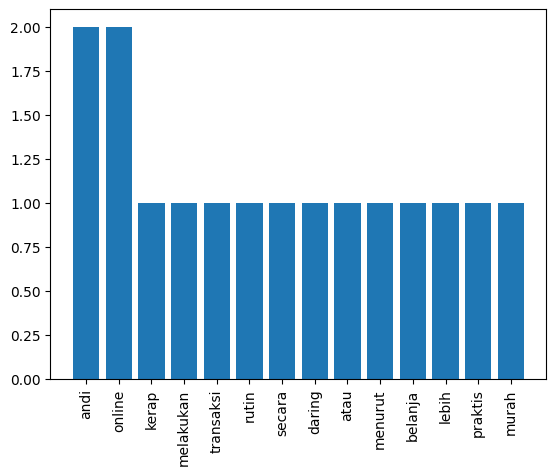

In [25]:
import matplotlib.pyplot as plt

plt.bar(
    [freq[0] for freq in kemunculan.most_common()],
    [freq[1] for freq in kemunculan.most_common()],
)
plt.xticks(rotation=90)
plt.show()

## Tokenizing: Sentences Tokenizing Using NLTK Module ##
Memisahkan kalimat dalam sebuah paragraf.

In [26]:
from nltk.tokenize import sent_tokenize

kalimat = "Andi kerap melakukan transaksi rutin secara daring atau online. Menurut Andi belanja online lebih praktis & murah."

tokens = nltk.tokenize.sent_tokenize(kalimat)

print(tokens)

['Andi kerap melakukan transaksi rutin secara daring atau online.', 'Menurut Andi belanja online lebih praktis & murah.']


## Filtering using NLTK ##

In [ ]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\steve\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [29]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

kalimat = "Andi dan icha kerap melakukan transaksi rutin secara daring atau online. Menurut Andi belanja online lebih praktis & murah."
kalimat = kalimat.translate(str.maketrans("", "", string.punctuation)).lower()

tokens = word_tokenize(kalimat)
listStopword = set(stopwords.words("Indonesian"))

removed = []
for t in tokens:
    if t not in listStopword:
        removed.append(t)

print(removed)

['andi', 'icha', 'kerap', 'transaksi', 'rutin', 'daring', 'online', 'andi', 'belanja', 'online', 'praktis', 'murah']


## Filtering using Sastrawi: Stopword List ##
Melihat daftar _stopword_ pada Sastrawi.

In [13]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()
print(stopwords)

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

## Filtering using Sastrawi ##

In [31]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from nltk.tokenize import word_tokenize

factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

kalimat = "Andi kerap melakukan transaksi rutin secara daring atau online. Menurut Andi belanja online lebih praktis & murah."
kalimat = kalimat.translate(str.maketrans("", "", string.punctuation)).lower()

stop = stopword.remove(kalimat)
tokens = nltk.tokenize.word_tokenize(stop)

print(tokens)

['andi', 'kerap', 'melakukan', 'transaksi', 'rutin', 'daring', 'online', 'andi', 'belanja', 'online', 'lebih', 'praktis', 'murah']


## Add Custom Stopword ##
Menambahkan kata di _stopword_ untuk dihilangkan pada sebuah teks.

In [32]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import (
    StopWordRemoverFactory,
    StopWordRemover,
    ArrayDictionary,
)
from nltk.tokenize import word_tokenize

# ambil stopword bawaan
stop_factory = StopWordRemoverFactory().get_stop_words()
more_stopword = ["daring", "online"]

kalimat = "Andi kerap melakukan transaksi rutin secara daring atau online. Menurut Andi belanja online lebih praktis & murah."
kalimat = kalimat.translate(str.maketrans("", "", string.punctuation)).lower()

# menggabungkan stopword
data = stop_factory + more_stopword

dictionary = ArrayDictionary(data)
str = StopWordRemover(dictionary)
tokens = nltk.tokenize.word_tokenize(str.remove(kalimat))

print(tokens)

['andi', 'kerap', 'melakukan', 'transaksi', 'rutin', 'daring', 'andi', 'belanja', 'online', 'lebih', 'praktis', 'murah']


## Stemming : Porter Stemming Algorithm using NLTK ##

https://tartarus.org/martin/PorterStemmer/index-old.html

In [33]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()

kata = ["program", "programs", "programer", "programing", "programers"]

for k in kata:
    print(k, " : ", ps.stem(k))

program  :  program
programs  :  program
programer  :  program
programing  :  program
programers  :  program


## Stemming Bahasa Indonesia using Sastrawi ##

In [34]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

kalimat = "Andi kerap melakukan transaksi rutin secara daring atau online. Menurut Andi belanja online lebih praktis & menyenangkan."

hasil = stemmer.stem(kalimat)

hasil


'andi kerap laku transaksi rutin cara daring atau online turut andi belanja online lebih praktis senang'

Referensi Artikel: 

https://medium.com/@ksnugroho/dasar-text-preprocessing-dengan-python-a4fa52608ffe